In [182]:
import numpy as np
import pylab as pl

import os
import json
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)


np.random.seed(333)
import statsmodels.api as sm
from statsmodels.formula.api import ols as fols
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [183]:
def myregression(x, y, method=None, formula = None):
 
    if formula:            
        rm = fols(formula, data={"x1" : x, "y" : y})
    else: 
        X = sm.add_constant(x)
        #print X,y
        if method == None or method == 'O':
            rm = sm.OLS(y, X)
        elif method == 'W':
            rm = sm.WLS(y, X)
        else:
            print "Problem in the way you called myregression"
            return -1
            
    reg = rm.fit()
    print "linear regression slope {}".format(reg.summary())
    return reg


def line(a, b, x):
    return a*x + b
def parabola(a, b, c, x):
    return a*x**2  + b*x + c

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
c0             1.0000   9.79e-16   1.02e+15      0.000         1.000     1.000
<F test: F=array([[  7.56861976e+31]]), p=1.98293420147e-79, df_denom=5, df_num=2>


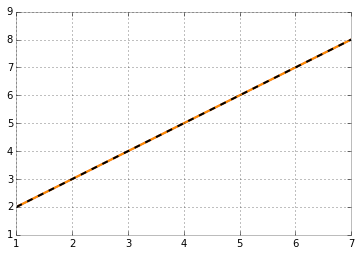

In [184]:
import numpy as np

import statsmodels.api as sm

Y = np.array([2.,3.,4.,5.,6.,7.,8.])
X = range(1,8)
X = sm.add_constant(X)

pl.plot(X,Y,'-')
model = sm.OLS(Y,X)
results = model.fit()
results.params
results.tvalues
pl.plot(X,results.predict(X),'-')
pl.plot(X,Y,'k--')
print(results.t_test([1, 0]))
print(results.f_test(np.identity(2)))

    
    

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.773e+32
Date:                Wed, 07 Oct 2015   Prob (F-statistic):               0.00
Time:                        17:01:32   Log-Likelihood:                 3050.5
No. Observations:                 100   AIC:                            -6097.
Df Residuals:                      98   BIC:                            -6092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         10.0000    3.2

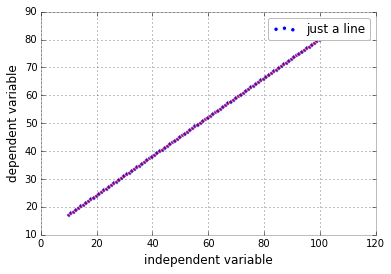

In [185]:
x = np.linspace(10,100,100)
y = line(0.7, 10, x)

mrnew = myregression(x, y)
mrold = mrnew
xnew =np.linspace(10,100,10)
pl.scatter(x, y, label = "just a line")
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.plot(xnew, mrnew.predict( sm.add_constant(xnew)), 'r', alpha=0.5)
pl.legend()

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2245.
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           2.30e-69
Time:                        17:01:37   Log-Likelihood:                -663.80
No. Observations:                 100   AIC:                             1332.
Df Residuals:                      98   BIC:                             1337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -690.9091     43

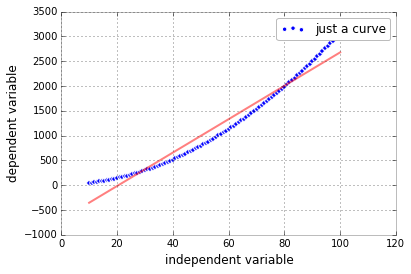

In [186]:

x = np.linspace(10,100,100)
y = parabola(0.3, 0.7, 10, x)
mrold = myregression(x, y)
mrnew = myregression(x, y)
xnew = np.linspace(10,100,10)
pl.scatter(x, y, label = "just a curve")
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.plot(xnew, mrnew.predict(sm.add_constant(xnew)), 'r', alpha=0.5)
pl.legend()


linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1906.
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           4.90e-66
Time:                        17:01:50   Log-Likelihood:                -673.74
No. Observations:                 100   AIC:                             1351.
Df Residuals:                      98   BIC:                             1357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -590.1996     47

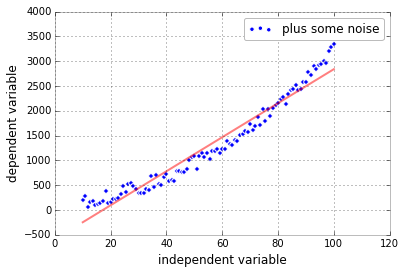

In [187]:
y = y+np.random.rand(100)*300.5
mrold = mrnew
mrnew = myregression(x, y)

pl.scatter(x, y, label = "plus some noise")
pl.plot(xnew, mrnew.predict(sm.add_constant(xnew)), 'r', alpha=0.5)

#pl.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5)
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5424.
Date:                Wed, 07 Oct 2015   Prob (F-statistic):          2.87e-100
Time:                        17:01:00   Log-Likelihood:                -588.35
No. Observations:                 100   AIC:                             1183.
Df Residuals:                      97   BIC:                             1191.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      110.2933 

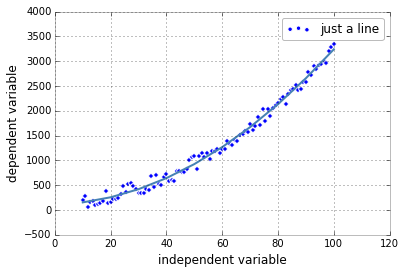

In [179]:
mrold = mrnew
mrnew = myregression(x, y, formula = "y ~ x1 + I((x1)) + I((x1)**2) ")

xnew = np.linspace(10,100,10)
pl.scatter(x, y, label = "just a line")
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.plot(xnew,mrnew.predict(exog=dict(x1=xnew)))
pl.legend()

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2149.
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           3.10e-95
Time:                        17:01:01   Log-Likelihood:                -587.27
No. Observations:                 100   AIC:                             1187.
Df Residuals:                      94   BIC:                             1202.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      167.9483 

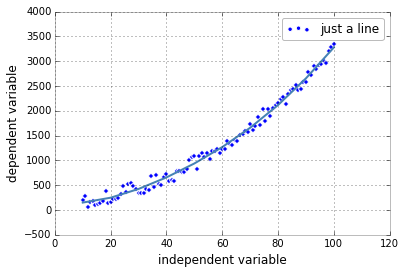

In [180]:
mrold = mrnew
mrnew = myregression(x, y, formula = "y ~ x1 + I((x1)) + I((x1)**2) + I((x1)**3) + I((x1)**4) + I((x1)**5) ")

xnew = np.linspace(10,100,10)
pl.scatter(x, y, label = "just a line")
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.plot(xnew,mrnew.predict(exog=dict(x1=xnew)))
pl.legend()

In [157]:
#y = y+np.cos(x/100*2*np.pi*10.0)
y = y+3e-3*((x-50)**2)
mrold = mrnew
mrnew = myregression(x, y, method='W')

print ("LR:", (+704.32-702.34))
import scipy
print ('{0:.2f}').format(1-scipy.stats.chi2(3).cdf(4.11))

linear regression slope                             WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            WLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     476.9
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           1.96e-39
Time:                        16:37:17   Log-Likelihood:                -735.91
No. Observations:                 100   AIC:                             1476.
Df Residuals:                      98   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         13.4755     89

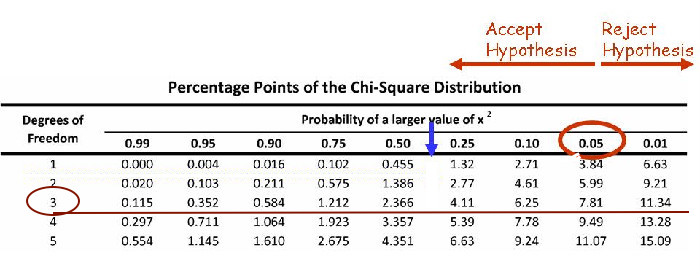

In [155]:
from IPython.display import Image
Image(filename="chisqtable.jpeg")

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     322.1
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           5.81e-50
Time:                        16:57:35   Log-Likelihood:                -704.18
No. Observations:                 100   AIC:                             1416.
Df Residuals:                      96   BIC:                             1427.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     1095.6310 

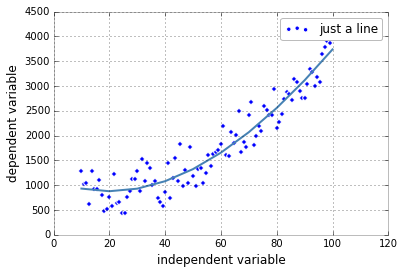

In [160]:
mrold = mrnew
mrnew = myregression(x, y, formula = "y ~ x1 + I((x1)) + I((x1)**2) + I((x1)**3) ")

xnew = np.linspace(10,100,10)
pl.scatter(x, y, label = "just a line")
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.plot(xnew,mrnew.predict(exog=dict(x1=xnew)))
pl.legend()

In [161]:
print ("LR:", (+704.32-704.18))
import scipy
print ('{0:.2f}').format(1-scipy.stats.chi2(3).cdf(4.11))


('LR:', 0.14000000000010004)
0.25


7.39222786531
21.2447744739


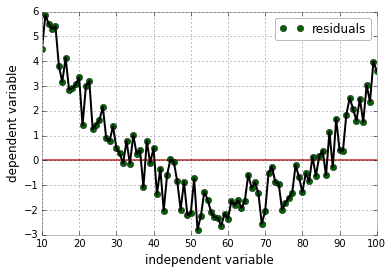

In [186]:
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')
pl.plot(x, y-mrnew.predict(x), 'o', color='DarkGreen', label='residuals')
pl.plot(x, y-mrnew.predict(x), 'k-')
print mean(y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)))
print np.sqrt(sum((y-mrnew.predict(x))**2))
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()

-3.7568300362
38.2030502027


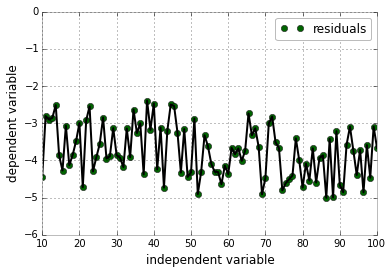

In [187]:
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')
pl.plot(x, y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)+mrres[0]*(x**2)), 'o', color='DarkGreen', label='residuals')
pl.plot(x, y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)+mrres[0]*(x**2)), 'k-')
print mean(y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)+mrres[0]*(x**2)))
print np.sqrt(sum((y-mrnew.predict(x)-(mrres[2]+mrres[1]*(x)+mrres[0]*(x**2)))**2))
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()

3.30580007812e-14
1.81818593057e-06


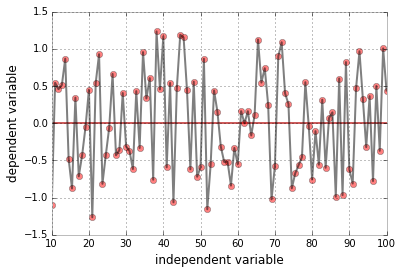

In [198]:
mrold = mrnew
mrnew = np.polyfit(x, y, 2)
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')

e = np.random.rand(100)*2.5+2.5
#pl.errorbar(x, y, yerr=e, label = "and some structure")
pl.plot(x, y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)), 'ro', alpha=0.5)
pl.plot(x, y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)), 'k', alpha=0.5)
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()
print mean(y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)))
print np.sqrt(sum((y-(mrnew[2]+mrnew[1]*(x)+mrnew[0]*(x**2)))))


#many more regression diagnostics!
http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/regression_diagnostics.html